### Data Source Link : https://data.world/johnitto/usedcarspriceprediction

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
import scipy.stats as ss
import plotly.express as px #Importing library
import pandas as pd
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import pie, axis, show
import math
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from patsy import dmatrices
from sklearn.impute import KNNImputer
import statsmodels.stats.api as sms
import pylab 
from sklearn.preprocessing import StandardScaler
from statsmodels.compat import lzip
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

### Reading the CSV File :

In [2]:
df = pd.read_csv('train-data.csv')

#### Creating a copy of the original DataFrame

In [3]:
df1=df.copy()

#### Reading the top Five Records of the DataFrame

In [4]:
df1.head(5)

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

#### Shape of the Dataframe :

In [5]:
df1.shape

(6019, 14)

#### Checking the Datatypes of the Variables in the DataFrame :

In [6]:
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

#### We are taking only the numeric part of the Mileage

In [7]:
df1['Mileage'] = df1['Mileage'].str.split(n = 1).str[0]

##### Converting the Mileage datatype to float data type

In [8]:
df1['Mileage'] = df1['Mileage'].astype('float')
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

##### Keeping only the numeric part of the Engine 

In [9]:
df1['Engine'] = df1['Engine'].str.split(n = 1).str[0]

##### Keeping only the numeric part of the Power

In [10]:
df1['Power'] = df1['Power'].str.split(n = 1).str[0]

##### Coverting data types of Engine and Power to Float data type

In [11]:
df1['Engine'] = df1['Engine'].astype('float')
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [12]:
df1['Power']=pd.to_numeric(df1['Power'], errors='coerce')
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price                float64
dtype: object

#### Checking Null Values in the DataFrame :

In [13]:
df1.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### Descriptive Statistics of the DataFrame :

In [14]:
df1.describe()

Unnamed: 0         Year  Kilometers_Driven      Mileage       Engine  \
count  6019.000000  6019.000000       6.019000e+03  6017.000000  5983.000000   
mean   3009.000000  2013.358199       5.873838e+04    18.134961  1621.276450   
std    1737.679967     3.269742       9.126884e+04     4.582289   601.355233   
min       0.000000  1998.000000       1.710000e+02     0.000000    72.000000   
25%    1504.500000  2011.000000       3.400000e+04    15.170000  1198.000000   
50%    3009.000000  2014.000000       5.300000e+04    18.150000  1493.000000   
75%    4513.500000  2016.000000       7.300000e+04    21.100000  1984.000000   
max    6018.000000  2019.000000       6.500000e+06    33.540000  5998.000000   

             Power        Seats        Price  
count  5876.000000  5977.000000  6019.000000  
mean    113.253050     5.278735     9.479468  
std      53.874957     0.808840    11.187917  
min      34.200000     0.000000     0.440000  
25%      75.000000     5.000000     3.500000  
50%      97.700000     5.000000     5.640000  
75%     138.100000     5.000000     9.950000  
max     560.000000    10.000000   160.000000

##### The Column Unnamed:0 has no meaning, so we are droping it

In [15]:
df1.drop(columns=df1.columns[0], axis=1,  inplace=True)
df1.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  6019.000000       6.019000e+03  6017.000000  5983.000000  5876.000000   
mean   2013.358199       5.873838e+04    18.134961  1621.276450   113.253050   
std       3.269742       9.126884e+04     4.582289   601.355233    53.874957   
min    1998.000000       1.710000e+02     0.000000    72.000000    34.200000   
25%    2011.000000       3.400000e+04    15.170000  1198.000000    75.000000   
50%    2014.000000       5.300000e+04    18.150000  1493.000000    97.700000   
75%    2016.000000       7.300000e+04    21.100000  1984.000000   138.100000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   560.000000   

             Seats        Price  
count  5977.000000  6019.000000  
mean      5.278735     9.479468  
std       0.808840    11.187917  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.640000  
75%       5.000000     9.950000  
max      10.000000   160.000000

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


##### As we can see, New_Price has so many missing values, we will not impute it. It's better to drop the column

In [17]:
df1 = df1.drop("New_Price", axis='columns')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


### We are creating two Column Car_Brand and Car_Model out of Name column :

In [19]:
df1['Car_Brand'] = df1['Name'].str.split(n = 1).str[0]

In [20]:
df1['Car_Model'] = df1['Name'].str.split(n = 2).str[1]

In [21]:
df1.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74   

  Car_Brand Car_Model  
0    Maruti     Wagon  
1   Hyundai     Creta  
2     Honda      Jazz  
3    Maruti    Ertiga  
4      Audi        A4

In [22]:
EDA1=df1.copy()

#### We are joining the Car_Brand and Car_Model column to make Car_Make column

In [23]:
df1["Car_Make"] = df1[["Car_Brand", "Car_Model"]].apply(lambda x: " ".join(x), axis =1)
df1.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74   

  Car_Brand Car_Model       Car_Make  
0    Maruti     Wagon   Maruti Wagon  
1   Hyundai     Creta  Hyundai Creta  
2     Honda      Jazz     Honda Jazz  
3    Maruti    Ertiga  Maruti Ertiga  
4      Audi        A4        Audi A4

#### We are droping the Name,Car_Brand and Car_Model Column

In [24]:
df1 = df1.drop("Name", axis='columns')

In [25]:
df1 = df1.drop("Car_Brand", axis='columns')

In [26]:
df1 = df1.drop("Car_Model", axis='columns')

In [27]:
df1.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price       Car_Make  
0    26.60   998.0   58.16    5.0   1.75   Maruti Wagon  
1    19.67  1582.0  126.20    5.0  12.50  Hyundai Creta  
2    18.20  1199.0   88.70    5.0   4.50     Honda Jazz  
3    20.77  1248.0   88.76    7.0   6.00  Maruti Ertiga  
4    15.20  1968.0  140.80    5.0  17.74        Audi A4

#### Car_Make has 216 unique values which is significantly less than the Name unique values ( 1876 - unique values )

In [28]:
df1['Car_Make'].nunique()

216

In [29]:
df['Name'].nunique()

1876

### Engine,Power and Seats has missing values 

In [30]:
df1.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Car_Make               0
dtype: int64

### We are creating car_age column and dropping the Year Column :

In [31]:
cur_year=2023

In [32]:
df1['car_age']=2023-df1['Year']

In [33]:
df1 = df1.drop("Year", axis='columns')

In [34]:
df1.head()

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0      Mumbai              72000       CNG       Manual      First    26.60   
1        Pune              41000    Diesel       Manual      First    19.67   
2     Chennai              46000    Petrol       Manual      First    18.20   
3     Chennai              87000    Diesel       Manual      First    20.77   
4  Coimbatore              40670    Diesel    Automatic     Second    15.20   

   Engine   Power  Seats  Price       Car_Make  car_age  
0   998.0   58.16    5.0   1.75   Maruti Wagon       13  
1  1582.0  126.20    5.0  12.50  Hyundai Creta        8  
2  1199.0   88.70    5.0   4.50     Honda Jazz       12  
3  1248.0   88.76    7.0   6.00  Maruti Ertiga       11  
4  1968.0  140.80    5.0  17.74        Audi A4       10

In [35]:
EDA1['car_age']=2023-EDA1['Year']

In [36]:
EDA1 = EDA1.drop("Year", axis='columns')

In [37]:
EDA1 = EDA1.drop("Name", axis='columns')

In [38]:
EDA1.head()

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0      Mumbai              72000       CNG       Manual      First    26.60   
1        Pune              41000    Diesel       Manual      First    19.67   
2     Chennai              46000    Petrol       Manual      First    18.20   
3     Chennai              87000    Diesel       Manual      First    20.77   
4  Coimbatore              40670    Diesel    Automatic     Second    15.20   

   Engine   Power  Seats  Price Car_Brand Car_Model  car_age  
0   998.0   58.16    5.0   1.75    Maruti     Wagon       13  
1  1582.0  126.20    5.0  12.50   Hyundai     Creta        8  
2  1199.0   88.70    5.0   4.50     Honda      Jazz       12  
3  1248.0   88.76    7.0   6.00    Maruti    Ertiga       11  
4  1968.0  140.80    5.0  17.74      Audi        A4       10

### Plotting Graphs for Visualisation and Insights

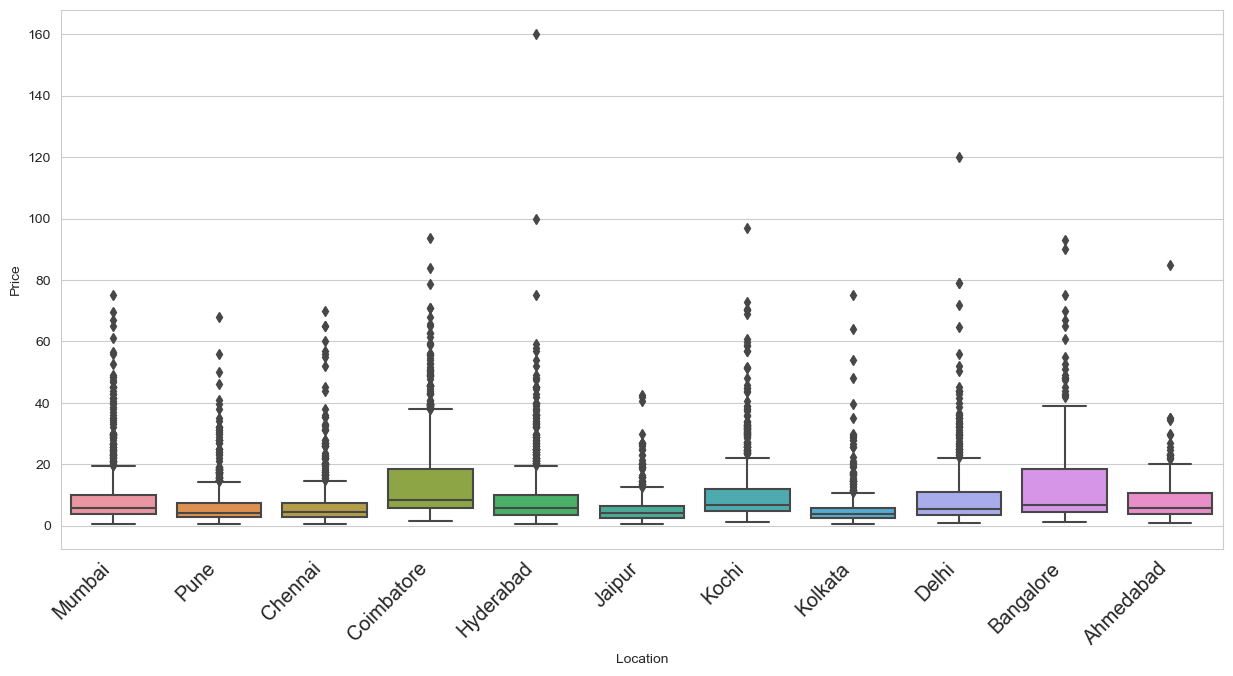

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))

sns.boxplot(x = 'Location', y = 'Price', data = EDA1)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Show the plot
plt.show()


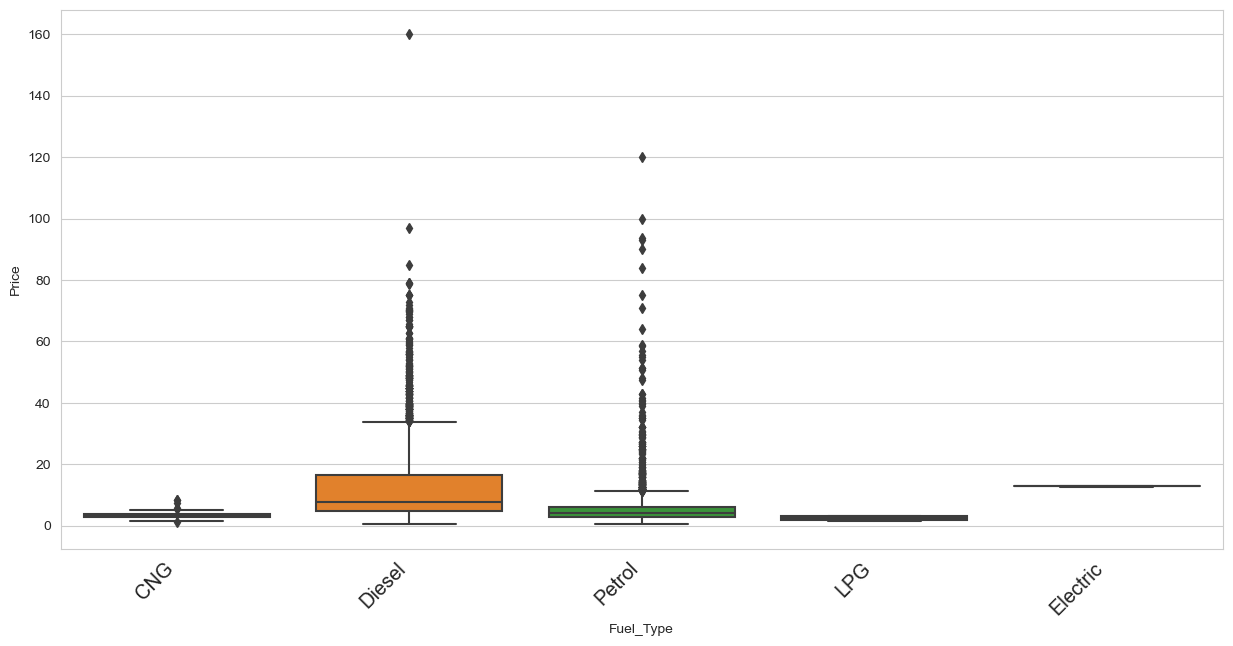

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))

sns.boxplot(x = 'Fuel_Type', y = 'Price', data = EDA1)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Show the plot
plt.show()


<AxesSubplot:xlabel='Transmission', ylabel='Price'>

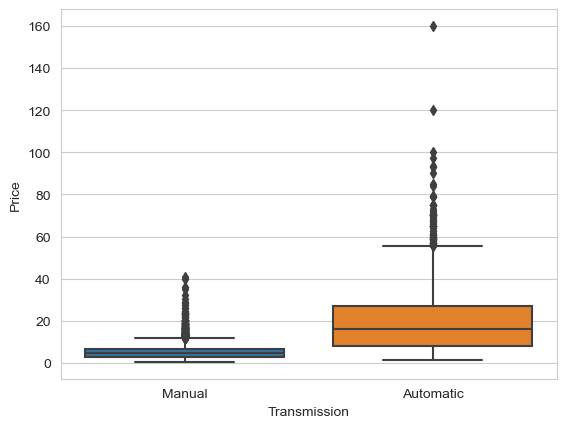

In [41]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Transmission', y = 'Price', data = EDA1)

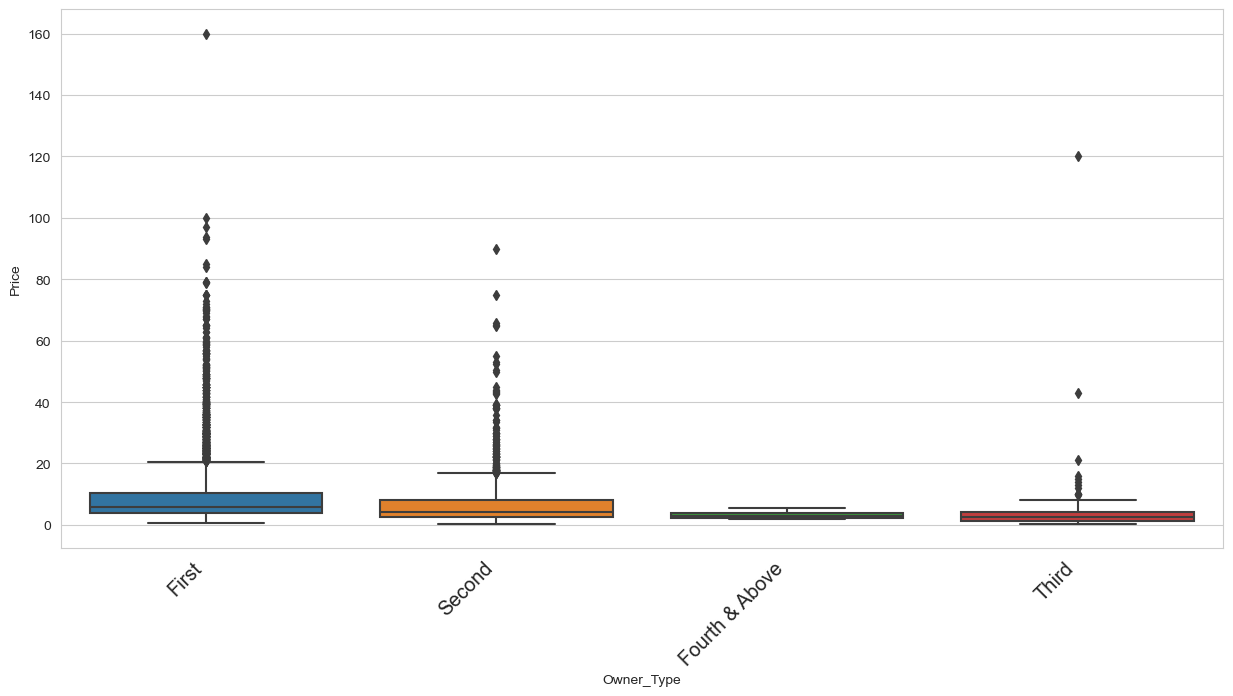

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))

sns.boxplot(x = 'Owner_Type', y = 'Price', data = EDA1)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Show the plot
plt.show()


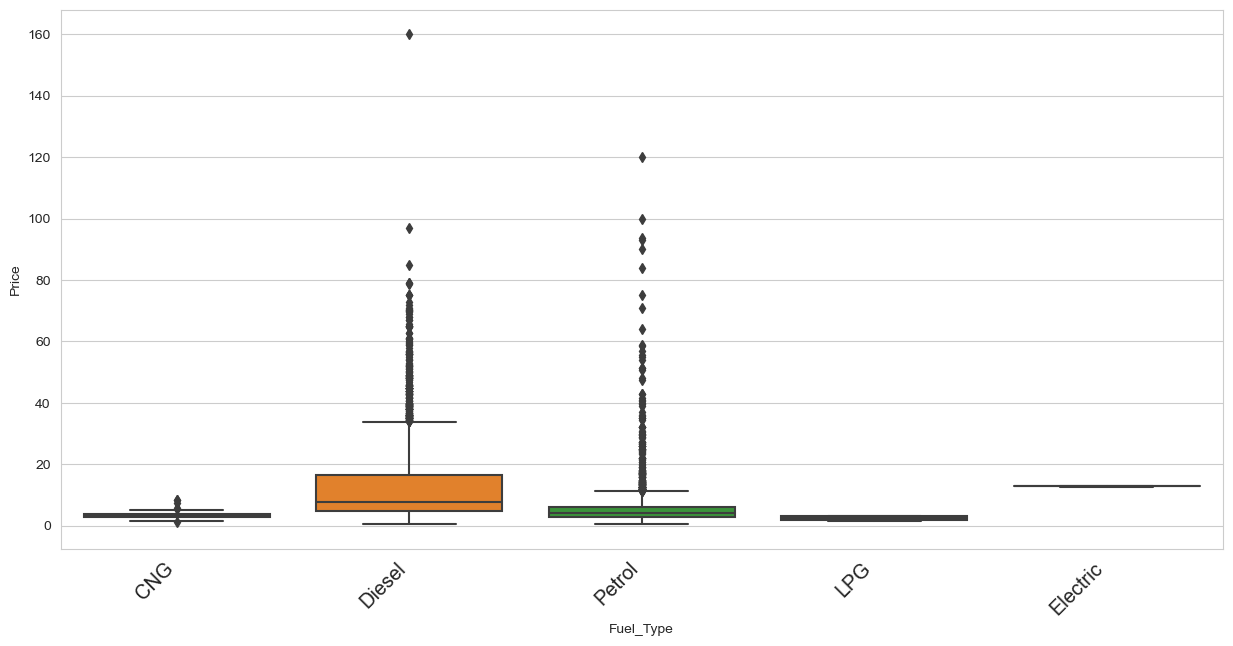

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = EDA1)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Show the plot
plt.show()


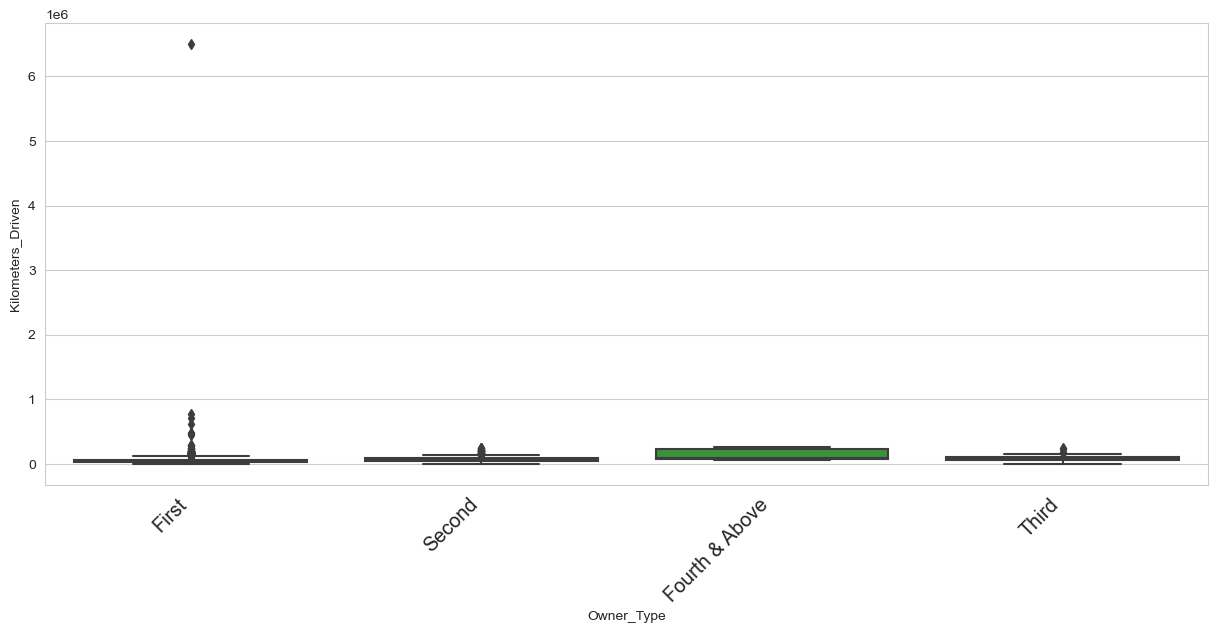

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Owner_Type', y = 'Kilometers_Driven', data = EDA1)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Show the plot
plt.show()


#### Outlier Analysis on Kilometers_Driven:

In [45]:
print(np.where(EDA1['Kilometers_Driven']>300000))

(array([ 340,  358, 1860, 2328, 2823, 3092, 4491], dtype=int64),)


In [46]:
df.loc[[340]]

Unnamed: 0                                    Name Location  Year  \
340         340  Skoda Octavia Ambition Plus 2.0 TDI AT  Kolkata  2013   

     Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage   Engine  \
340             775000    Diesel    Automatic      First  19.3 kmpl  1968 CC   

       Power  Seats New_Price  Price  
340  141 bhp    5.0       NaN    7.5

In [47]:
df.loc[[358]]

Unnamed: 0                   Name Location  Year  Kilometers_Driven  \
358         358  Hyundai i10 Magna 1.2  Chennai  2009             620000   

    Fuel_Type Transmission Owner_Type     Mileage   Engine     Power  Seats  \
358    Petrol       Manual      First  20.36 kmpl  1197 CC  78.9 bhp    5.0   

    New_Price  Price  
358       NaN    2.7

In [48]:
df.loc[[1860]]

Unnamed: 0                              Name Location  Year  \
1860        1860  Volkswagen Vento Diesel Highline  Chennai  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
1860             720000    Diesel       Manual      First  20.54 kmpl   

       Engine      Power  Seats New_Price  Price  
1860  1598 CC  103.6 bhp    5.0       NaN    5.9

In [49]:
df.loc[[2328]]

Unnamed: 0                       Name Location  Year  Kilometers_Driven  \
2328        2328  BMW X5 xDrive 30d M Sport  Chennai  2017            6500000   

     Fuel_Type Transmission Owner_Type     Mileage   Engine    Power  Seats  \
2328    Diesel    Automatic      First  15.97 kmpl  2993 CC  258 bhp    5.0   

     New_Price  Price  
2328       NaN   65.0

In [50]:
df.loc[[2823]]

Unnamed: 0                                             Name Location  \
2823        2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT  Chennai   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
2823  2015             480000    Diesel    Automatic      First  16.96 kmpl   

       Engine       Power  Seats New_Price  Price  
2823  1968 CC  138.03 bhp    5.0       NaN   13.0

In [51]:
df.loc[[3092]]

Unnamed: 0                  Name Location  Year  Kilometers_Driven  \
3092        3092  Honda City i VTEC SV  Kolkata  2015             480000   

     Fuel_Type Transmission Owner_Type    Mileage   Engine      Power  Seats  \
3092    Petrol       Manual      First  17.4 kmpl  1497 CC  117.3 bhp    5.0   

     New_Price  Price  
3092       NaN    5.0

In [52]:
df.loc[[4491]]

Unnamed: 0                            Name   Location  Year  \
4491        4491  Hyundai i20 Magna Optional 1.2  Bangalore  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage   Engine  \
4491             445000    Petrol       Manual      First  18.5 kmpl  1197 CC   

         Power  Seats New_Price  Price  
4491  82.9 bhp    5.0       NaN   4.45

<AxesSubplot:xlabel='Fuel_Type', ylabel='Kilometers_Driven'>

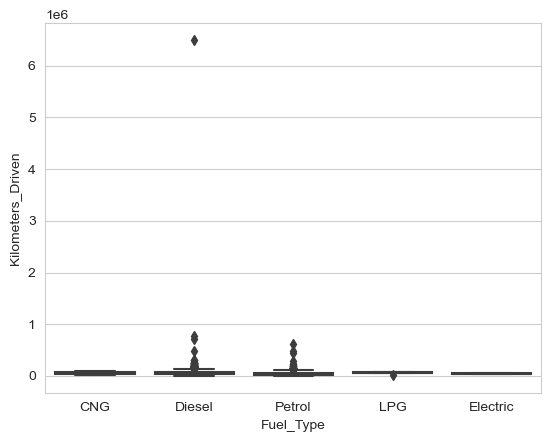

In [53]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Fuel_Type', y = 'Kilometers_Driven', data = EDA1)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Engine'>

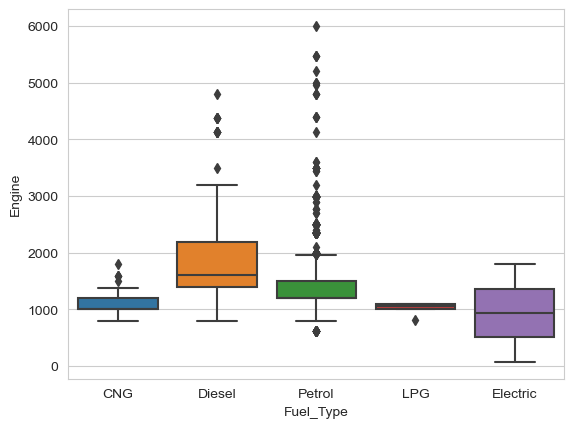

In [54]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Fuel_Type', y = 'Engine', data = EDA1)

<AxesSubplot:ylabel='None'>

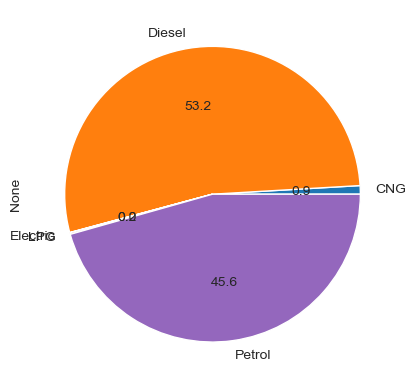

In [55]:
EDA1.groupby('Fuel_Type').size().plot(kind='pie', autopct='%.1f')

<AxesSubplot:ylabel='None'>

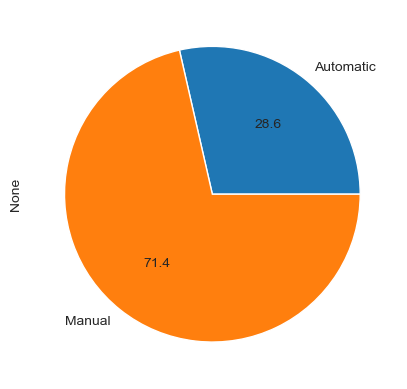

In [56]:
EDA1.groupby('Transmission').size().plot(kind='pie', autopct='%.1f')

<AxesSubplot:ylabel='None'>

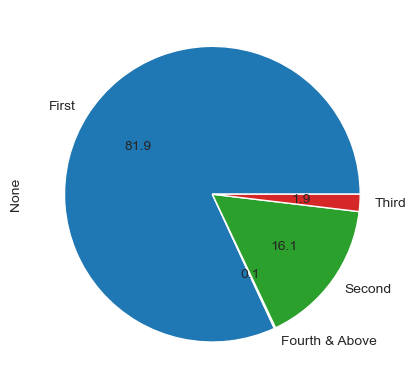

In [57]:
EDA1.groupby('Owner_Type').size().plot(kind='pie', autopct='%.1f')

<AxesSubplot:ylabel='None'>

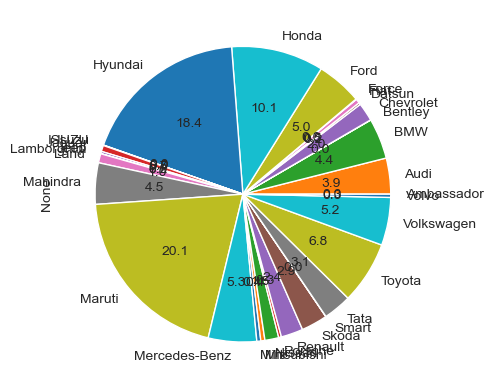

In [58]:
EDA1.groupby('Car_Brand').size().plot(kind='pie', autopct='%.1f')

<AxesSubplot:ylabel='None'>

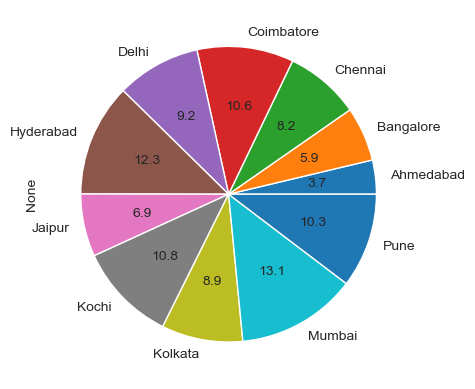

In [59]:
EDA1.groupby('Location').size().plot(kind='pie', autopct='%.1f')

In [60]:
car_brand_mean = EDA1.groupby('Car_Brand').Price.agg('mean')
car_brand_mean = round(car_brand_mean)
car_brand_mean=car_brand_mean.to_dict()
car_brand_mean

{'Ambassador': 1.0,
 'Audi': 26.0,
 'BMW': 25.0,
 'Bentley': 59.0,
 'Chevrolet': 3.0,
 'Datsun': 3.0,
 'Fiat': 3.0,
 'Force': 9.0,
 'Ford': 7.0,
 'Honda': 5.0,
 'Hyundai': 5.0,
 'ISUZU': 12.0,
 'Isuzu': 20.0,
 'Jaguar': 38.0,
 'Jeep': 19.0,
 'Lamborghini': 120.0,
 'Land': 39.0,
 'Mahindra': 8.0,
 'Maruti': 5.0,
 'Mercedes-Benz': 27.0,
 'Mini': 27.0,
 'Mitsubishi': 11.0,
 'Nissan': 5.0,
 'Porsche': 48.0,
 'Renault': 6.0,
 'Skoda': 8.0,
 'Smart': 3.0,
 'Tata': 4.0,
 'Toyota': 12.0,
 'Volkswagen': 5.0,
 'Volvo': 19.0}

In [61]:
car_brand1=pd.DataFrame(list(car_brand_mean.items()),columns=['Brand','Avg_Price'])
car_brand1

Brand  Avg_Price
0      Ambassador        1.0
1            Audi       26.0
2             BMW       25.0
3         Bentley       59.0
4       Chevrolet        3.0
5          Datsun        3.0
6            Fiat        3.0
7           Force        9.0
8            Ford        7.0
9           Honda        5.0
10        Hyundai        5.0
11          ISUZU       12.0
12          Isuzu       20.0
13         Jaguar       38.0
14           Jeep       19.0
15    Lamborghini      120.0
16           Land       39.0
17       Mahindra        8.0
18         Maruti        5.0
19  Mercedes-Benz       27.0
20           Mini       27.0
21     Mitsubishi       11.0
22         Nissan        5.0
23        Porsche       48.0
24        Renault        6.0
25          Skoda        8.0
26          Smart        3.0
27           Tata        4.0
28         Toyota       12.0
29     Volkswagen        5.0
30          Volvo       19.0

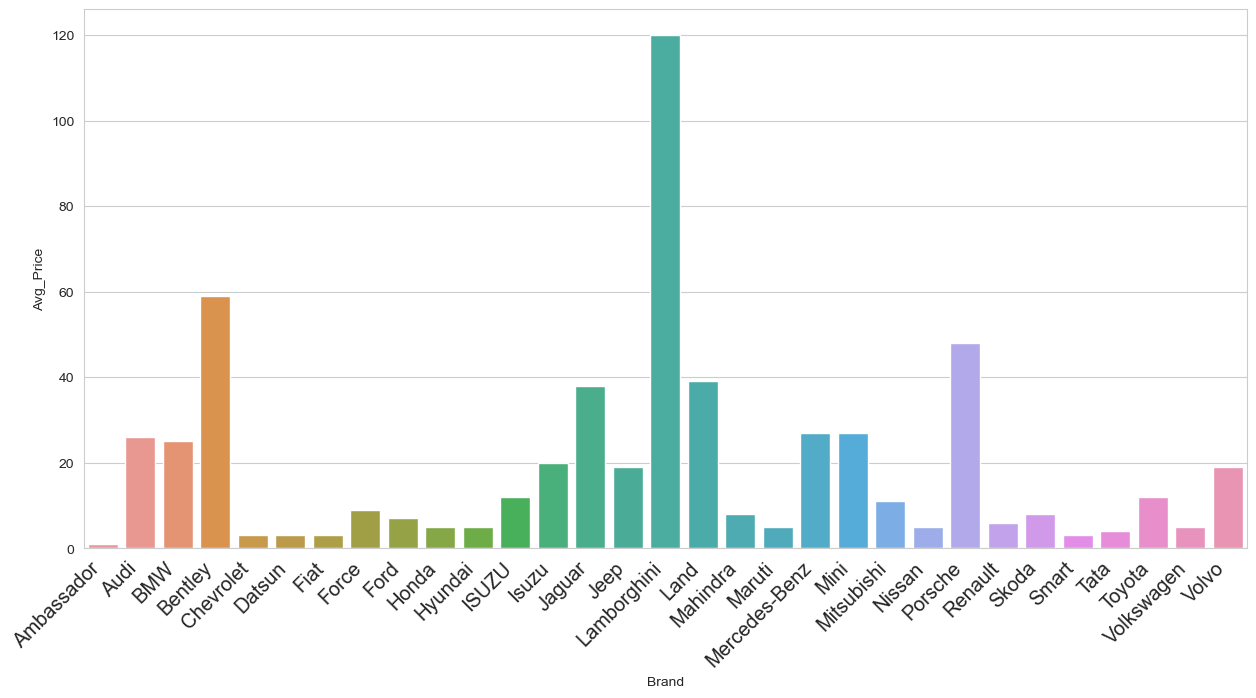

In [62]:
plt.figure(figsize=(15,7))

sns.barplot(x = 'Brand',
            y = 'Avg_Price',
            data = car_brand1)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Show the plot
plt.show()

In [63]:
owner_type_mean = EDA1.groupby('Owner_Type').car_age.agg('mean')
owner_type_mean = round(owner_type_mean)
owner_type_mean=owner_type_mean.to_dict()
owner_type_mean

{'First': 9.0, 'Fourth & Above': 16.0, 'Second': 12.0, 'Third': 15.0}

In [64]:
owner_type1=pd.DataFrame(list(owner_type_mean.items()),columns=['Owner_Type','Avg_Car_Age'])
owner_type1

Owner_Type  Avg_Car_Age
0           First          9.0
1  Fourth & Above         16.0
2          Second         12.0
3           Third         15.0

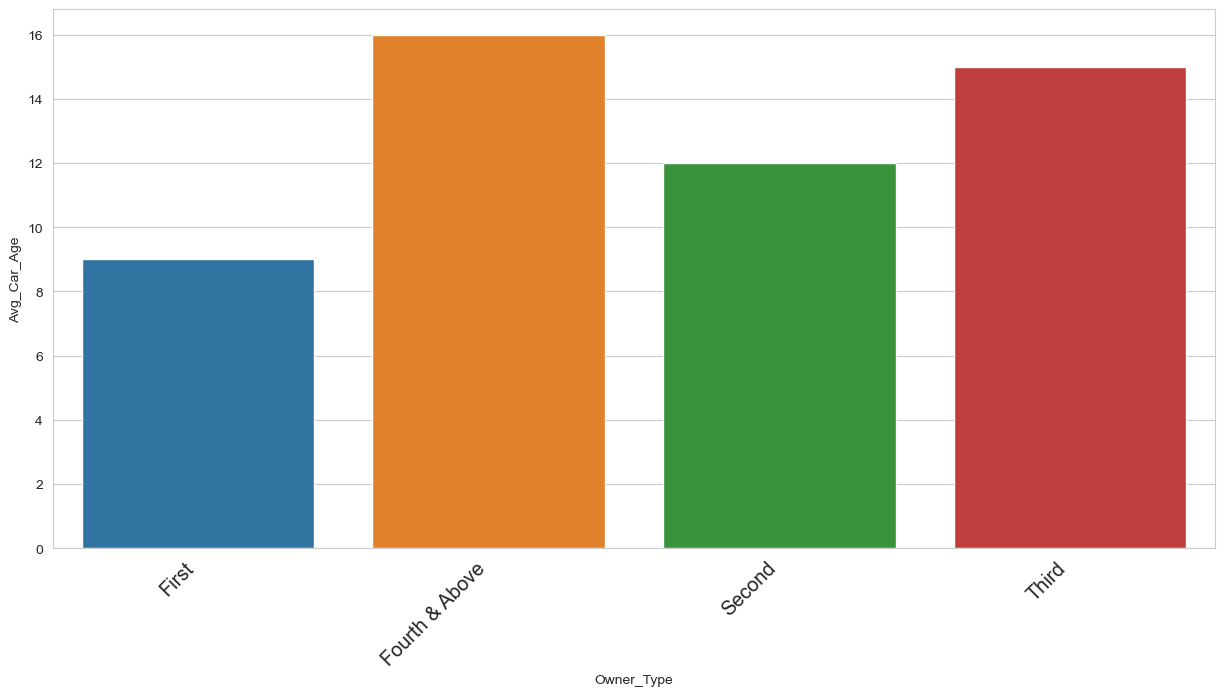

In [65]:
plt.figure(figsize=(15,7))

sns.barplot(x = 'Owner_Type',
            y = 'Avg_Car_Age',
            data = owner_type1)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Show the plot
plt.show()

In [66]:
owner_type_kd_mean = EDA1.groupby('Owner_Type').Kilometers_Driven.agg('mean')
owner_type_kd_mean = round(owner_type_kd_mean)
owner_type_kd_mean=owner_type_kd_mean.to_dict()
owner_type_kd_mean

{'First': 55367.0,
 'Fourth & Above': 135759.0,
 'Second': 71693.0,
 'Third': 88695.0}

In [67]:
owner_type2=pd.DataFrame(list(owner_type_kd_mean.items()),columns=['Owner_Type','Avg_KM_Driven'])
owner_type2

Owner_Type  Avg_KM_Driven
0           First        55367.0
1  Fourth & Above       135759.0
2          Second        71693.0
3           Third        88695.0

In [68]:
plt.figure(figsize=(15,7))

sns.barplot(x = 'Owner_Type',
            y = 'Avg_KM_Driven',
            data = owner_type2)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

# Show the plot
plt.show()

#### We need to encode the categorical variable. Here we have calculated the Mean of the each class in the column with repect to the Price. The logic is higher the Mean Value of the class higher the weightage it has got.

In [69]:
car_make_mean = df1.groupby('Car_Make').Price.agg('mean')
car_make_mean = round(car_make_mean)
car_make_mean.head(50)
car_make_mean

Car_Make
Ambassador Classic     1.0
Audi A3               19.0
Audi A4               18.0
Audi A6               22.0
Audi A7               27.0
                      ... 
Volvo S60             20.0
Volvo S80              9.0
Volvo V40             20.0
Volvo XC60            18.0
Volvo XC90            24.0
Name: Price, Length: 216, dtype: float64

In [70]:
car_1=car_make_mean.to_dict()

In [71]:
car_1

{'Ambassador Classic': 1.0,
 'Audi A3': 19.0,
 'Audi A4': 18.0,
 'Audi A6': 22.0,
 'Audi A7': 27.0,
 'Audi A8': 29.0,
 'Audi Q3': 23.0,
 'Audi Q5': 31.0,
 'Audi Q7': 41.0,
 'Audi RS5': 39.0,
 'Audi TT': 31.0,
 'BMW 1': 17.0,
 'BMW 3': 18.0,
 'BMW 5': 25.0,
 'BMW 6': 46.0,
 'BMW 7': 40.0,
 'BMW X1': 20.0,
 'BMW X3': 32.0,
 'BMW X5': 38.0,
 'BMW X6': 50.0,
 'BMW Z4': 44.0,
 'Bentley Continental': 59.0,
 'Chevrolet Aveo': 1.0,
 'Chevrolet Beat': 2.0,
 'Chevrolet Captiva': 4.0,
 'Chevrolet Cruze': 6.0,
 'Chevrolet Enjoy': 4.0,
 'Chevrolet Optra': 2.0,
 'Chevrolet Sail': 3.0,
 'Chevrolet Spark': 2.0,
 'Chevrolet Tavera': 5.0,
 'Datsun GO': 3.0,
 'Datsun Redi': 3.0,
 'Datsun redi-GO': 3.0,
 'Fiat Avventura': 6.0,
 'Fiat Grande': 3.0,
 'Fiat Linea': 3.0,
 'Fiat Petra': 1.0,
 'Fiat Punto': 3.0,
 'Fiat Siena': 1.0,
 'Force One': 9.0,
 'Ford Aspire': 7.0,
 'Ford Classic': 3.0,
 'Ford EcoSport': 8.0,
 'Ford Ecosport': 7.0,
 'Ford Endeavour': 19.0,
 'Ford Fiesta': 3.0,
 'Ford Figo': 4.0,
 'Ford Fr

In [72]:
df1=df1.replace({"Car_Make": car_1})

In [73]:
df1.head()

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0      Mumbai              72000       CNG       Manual      First    26.60   
1        Pune              41000    Diesel       Manual      First    19.67   
2     Chennai              46000    Petrol       Manual      First    18.20   
3     Chennai              87000    Diesel       Manual      First    20.77   
4  Coimbatore              40670    Diesel    Automatic     Second    15.20   

   Engine   Power  Seats  Price  Car_Make  car_age  
0   998.0   58.16    5.0   1.75       3.0       13  
1  1582.0  126.20    5.0  12.50      12.0        8  
2  1199.0   88.70    5.0   4.50       6.0       12  
3  1248.0   88.76    7.0   6.00       7.0       11  
4  1968.0  140.80    5.0  17.74      18.0       10

In [74]:
Location_mean = df1.groupby('Location').Price.agg('mean')
Location_mean = round(Location_mean)
Location_mean.head(50)
Location_mean

Location
Ahmedabad      8.0
Bangalore     13.0
Chennai        8.0
Coimbatore    15.0
Delhi         10.0
Hyderabad     10.0
Jaipur         6.0
Kochi         11.0
Kolkata        6.0
Mumbai         9.0
Pune           7.0
Name: Price, dtype: float64

### We can observe that Coimbatore has got highest weightage. Jaipur and Kolkata has got lowest weightage jointly.

In [75]:
Location_1=Location_mean.to_dict()

In [76]:
Location_1

{'Ahmedabad': 8.0,
 'Bangalore': 13.0,
 'Chennai': 8.0,
 'Coimbatore': 15.0,
 'Delhi': 10.0,
 'Hyderabad': 10.0,
 'Jaipur': 6.0,
 'Kochi': 11.0,
 'Kolkata': 6.0,
 'Mumbai': 9.0,
 'Pune': 7.0}

In [77]:
df1=df1.replace({"Location": Location_1})

In [78]:
df1.head()

Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
0       9.0              72000       CNG       Manual      First    26.60   
1       7.0              41000    Diesel       Manual      First    19.67   
2       8.0              46000    Petrol       Manual      First    18.20   
3       8.0              87000    Diesel       Manual      First    20.77   
4      15.0              40670    Diesel    Automatic     Second    15.20   

   Engine   Power  Seats  Price  Car_Make  car_age  
0   998.0   58.16    5.0   1.75       3.0       13  
1  1582.0  126.20    5.0  12.50      12.0        8  
2  1199.0   88.70    5.0   4.50       6.0       12  
3  1248.0   88.76    7.0   6.00       7.0       11  
4  1968.0  140.80    5.0  17.74      18.0       10

In [79]:
Fuel_Type_Mean = df1.groupby('Fuel_Type').Price.agg('mean')
Fuel_Type_Mean = round(Fuel_Type_Mean)
Fuel_Type_Mean.head(50)
Fuel_Type_Mean

Fuel_Type
CNG          4.0
Diesel      13.0
Electric    13.0
LPG          2.0
Petrol       6.0
Name: Price, dtype: float64

#### We can observe that Diesel and Electric has got highest weightage. Lpg has got lowest weightage.

In [80]:
Fuel_Type_Mean_1=Fuel_Type_Mean.to_dict()

In [81]:
df1=df1.replace({"Fuel_Type": Fuel_Type_Mean_1})

In [82]:
df1.head()

Location  Kilometers_Driven  Fuel_Type Transmission Owner_Type  Mileage  \
0       9.0              72000        4.0       Manual      First    26.60   
1       7.0              41000       13.0       Manual      First    19.67   
2       8.0              46000        6.0       Manual      First    18.20   
3       8.0              87000       13.0       Manual      First    20.77   
4      15.0              40670       13.0    Automatic     Second    15.20   

   Engine   Power  Seats  Price  Car_Make  car_age  
0   998.0   58.16    5.0   1.75       3.0       13  
1  1582.0  126.20    5.0  12.50      12.0        8  
2  1199.0   88.70    5.0   4.50       6.0       12  
3  1248.0   88.76    7.0   6.00       7.0       11  
4  1968.0  140.80    5.0  17.74      18.0       10

In [83]:
Transmission_Mean = df1.groupby('Transmission').Price.agg('mean')
Transmission_Mean = round(Transmission_Mean)
Transmission_Mean.head(50)
Transmission_Mean

Transmission
Automatic    20.0
Manual        5.0
Name: Price, dtype: float64

#### We can observe that Automatic has got higher weightage than manual.

In [84]:
Transmission_Mean_1=Transmission_Mean.to_dict()

In [85]:
df1=df1.replace({"Transmission": Transmission_Mean_1})

In [86]:
df1.head()

Location  Kilometers_Driven  Fuel_Type  Transmission Owner_Type  Mileage  \
0       9.0              72000        4.0           5.0      First    26.60   
1       7.0              41000       13.0           5.0      First    19.67   
2       8.0              46000        6.0           5.0      First    18.20   
3       8.0              87000       13.0           5.0      First    20.77   
4      15.0              40670       13.0          20.0     Second    15.20   

   Engine   Power  Seats  Price  Car_Make  car_age  
0   998.0   58.16    5.0   1.75       3.0       13  
1  1582.0  126.20    5.0  12.50      12.0        8  
2  1199.0   88.70    5.0   4.50       6.0       12  
3  1248.0   88.76    7.0   6.00       7.0       11  
4  1968.0  140.80    5.0  17.74      18.0       10

In [87]:
Owner_Type_mean = df1.groupby('Owner_Type').Price.agg('mean')
Owner_Type_mean = round(Owner_Type_mean)
Owner_Type_mean.head(50)
Owner_Type_mean

Owner_Type
First             10.0
Fourth & Above     3.0
Second             8.0
Third              5.0
Name: Price, dtype: float64

#### We can observe that First owner has got highest weightage. Fourth and above has got lowest weightage.

In [88]:
Owner_Type_mean_1=Owner_Type_mean.to_dict()

In [89]:
df1=df1.replace({"Owner_Type": Owner_Type_mean_1})

In [90]:
df1.head()

Location  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0       9.0              72000        4.0           5.0        10.0    26.60   
1       7.0              41000       13.0           5.0        10.0    19.67   
2       8.0              46000        6.0           5.0        10.0    18.20   
3       8.0              87000       13.0           5.0        10.0    20.77   
4      15.0              40670       13.0          20.0         8.0    15.20   

   Engine   Power  Seats  Price  Car_Make  car_age  
0   998.0   58.16    5.0   1.75       3.0       13  
1  1582.0  126.20    5.0  12.50      12.0        8  
2  1199.0   88.70    5.0   4.50       6.0       12  
3  1248.0   88.76    7.0   6.00       7.0       11  
4  1968.0  140.80    5.0  17.74      18.0       10

In [91]:
df1.duplicated().value_counts()

False    6017
True        2
dtype: int64

In [92]:
corrs = df1.corr()

fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation of whole Data',  
                 plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'))

In [93]:
df1['Price'].skew()

3.3352319876668415

##### The Traget Variable 'Price' has skewness

### Distribution Plot of the Target

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\426642906.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




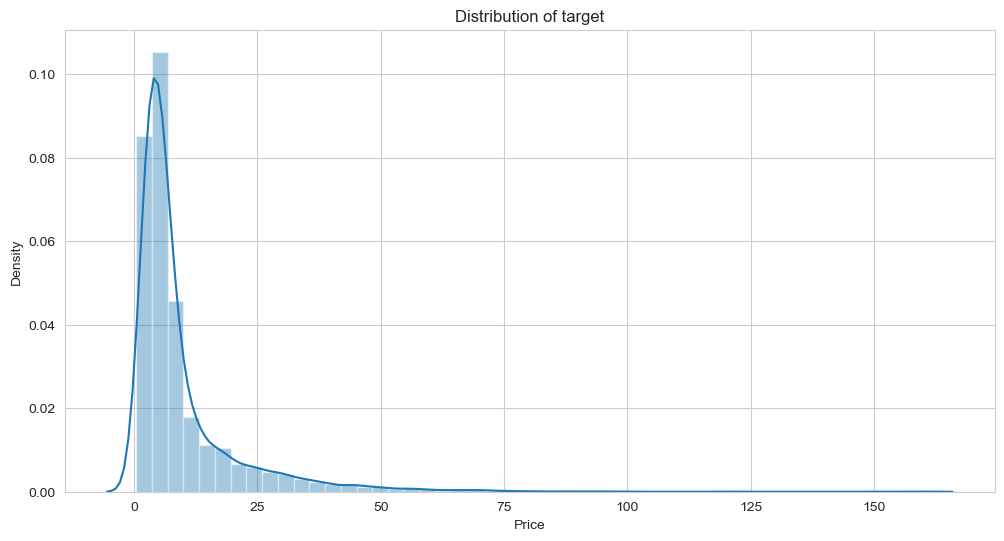

In [94]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of target')
sns.distplot(df1['Price'])
plt.show()

#### We are doing boxcox transformation of the Target Variable, to reduce the skewness

In [95]:
df1['Price'] = ss.boxcox(df1['Price'])[0]

In [96]:
df1['Price'].skew()

-0.004812698339470734

### We can see, skewness has been reduced significanltly.

#### Distribution Plot of the Target after box-cox transformation :

In [97]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of target after transformation')
sns.distplot(df1['Price'])
plt.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\3463278149.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




In [98]:
df1.head()

Location  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  \
0       9.0              72000        4.0           5.0        10.0    26.60   
1       7.0              41000       13.0           5.0        10.0    19.67   
2       8.0              46000        6.0           5.0        10.0    18.20   
3       8.0              87000       13.0           5.0        10.0    20.77   
4      15.0              40670       13.0          20.0         8.0    15.20   

   Engine   Power  Seats     Price  Car_Make  car_age  
0   998.0   58.16    5.0  0.535809       3.0       13  
1  1582.0  126.20    5.0  2.086280      12.0        8  
2  1199.0   88.70    5.0  1.340157       6.0       12  
3  1248.0   88.76    7.0  1.562457       7.0       11  
4  1968.0  140.80    5.0  2.315717      18.0       10

In [99]:
df1.isnull().sum()

Location               0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Car_Make               0
car_age                0
dtype: int64

#### We are imputing the Mileage,Engine,Power and Seats with KNNimputation.

In [100]:
imputer=KNNImputer(n_neighbors=3)
df_i=imputer.fit_transform(df1[['Mileage','Engine','Power','Seats']])
df_i

array([[  26.6 ,  998.  ,   58.16,    5.  ],
       [  19.67, 1582.  ,  126.2 ,    5.  ],
       [  18.2 , 1199.  ,   88.7 ,    5.  ],
       ...,
       [  14.  , 2498.  ,  112.  ,    8.  ],
       [  18.9 ,  998.  ,   67.1 ,    5.  ],
       [  25.44,  936.  ,   57.6 ,    5.  ]])

#### We are creating Imputed DataFrame with Mileage,Engine,Power and Seats Column

In [101]:
df_imp=pd.DataFrame(df_i,columns=['Mileage','Engine','Power','Seats'])
df_imp

Mileage  Engine   Power  Seats
0       26.60   998.0   58.16    5.0
1       19.67  1582.0  126.20    5.0
2       18.20  1199.0   88.70    5.0
3       20.77  1248.0   88.76    7.0
4       15.20  1968.0  140.80    5.0
...       ...     ...     ...    ...
6014    28.40  1248.0   74.00    5.0
6015    24.40  1120.0   71.00    5.0
6016    14.00  2498.0  112.00    8.0
6017    18.90   998.0   67.10    5.0
6018    25.44   936.0   57.60    5.0

[6019 rows x 4 columns]

In [102]:
df_imp.isnull().sum()

Mileage    0
Engine     0
Power      0
Seats      0
dtype: int64

##### We can observe that there are no missing value present in the Imputed DataFrame after imputation

In [103]:
df1 = df1.drop(["Mileage","Engine","Power","Seats"],axis='columns')

In [104]:
df5 = pd.concat([df_imp,df1],axis=1)

In [105]:
df5.head()

Mileage  Engine   Power  Seats  Location  Kilometers_Driven  Fuel_Type  \
0    26.60   998.0   58.16    5.0       9.0              72000        4.0   
1    19.67  1582.0  126.20    5.0       7.0              41000       13.0   
2    18.20  1199.0   88.70    5.0       8.0              46000        6.0   
3    20.77  1248.0   88.76    7.0       8.0              87000       13.0   
4    15.20  1968.0  140.80    5.0      15.0              40670       13.0   

   Transmission  Owner_Type     Price  Car_Make  car_age  
0           5.0        10.0  0.535809       3.0       13  
1           5.0        10.0  2.086280      12.0        8  
2           5.0        10.0  1.340157       6.0       12  
3           5.0        10.0  1.562457       7.0       11  
4          20.0         8.0  2.315717      18.0       10

In [106]:
df6=df5.copy()

In [107]:
df5.describe()

Mileage       Engine        Power        Seats     Location  \
count  6019.000000  6019.000000  6019.000000  6019.000000  6019.000000   
mean     18.135376  1620.908014   112.774210     5.277012     9.505067   
std       4.582897   600.555615    53.826086     0.807254     2.664545   
min       0.000000    72.000000    34.200000     0.000000     6.000000   
25%      15.170000  1198.000000    74.000000     5.000000     7.000000   
50%      18.150000  1493.000000    93.700000     5.000000     9.000000   
75%      21.100000  1984.000000   138.100000     5.000000    11.000000   
max      33.540000  5998.000000   560.000000    10.000000    15.000000   

       Kilometers_Driven    Fuel_Type  Transmission   Owner_Type        Price  \
count       6.019000e+03  6019.000000   6019.000000  6019.000000  6019.000000   
mean        5.873838e+04     9.704436      9.286426     9.574016     1.543289   
std         9.126884e+04     3.528576      6.777210     1.002305     0.647552   
min         1.710000e+02     2.000000      5.000000     3.000000    -0.876058   
25%         3.400000e+04     6.000000      5.000000    10.000000     1.137597   
50%         5.300000e+04    13.000000      5.000000    10.000000     1.515485   
75%         7.300000e+04    13.000000     20.000000    10.000000     1.929845   
max         6.500000e+06    13.000000     20.000000    10.000000     3.502082   

          Car_Make      car_age  
count  6019.000000  6019.000000  
mean      9.485629     9.641801  
std       9.745409     3.269742  
min       1.000000     4.000000  
25%       4.000000     7.000000  
50%       6.000000     9.000000  
75%      10.000000    12.000000  
max     120.000000    25.000000

### Building OLS model with all the Features

In [108]:
b,a = dmatrices('Price ~ Location+Kilometers_Driven+Fuel_Type+Transmission+Owner_Type+Mileage+Engine+Power+Seats+Car_Make+car_age',data=df5,return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

vif

VIF           variable
0   343.171533          Intercept
1     1.102717           Location
2     1.053798  Kilometers_Driven
3     1.806759          Fuel_Type
4     1.873664       Transmission
5     1.189304         Owner_Type
6     2.452843            Mileage
7     8.498551             Engine
8     8.412876              Power
9     1.834580              Seats
10    3.815671           Car_Make
11    1.580060            car_age

In [109]:
mod = sm.OLS(b,a)
first = mod.fit()
first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     4104.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:02   Log-Likelihood:                 521.46
No. Observations:                6019   AIC:                            -1019.
Df Residuals:                    6007   BIC:                            -938.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8873      0.053     16.731      0.000       0.783       0.991
Location              0.0202      0.001     17.868      0.000       0.018       0.022
Kilometers_Driven -3.964e-08   3.22e-08     -1.231      0.218   -1.03e-07    2.35e-08
Fuel_Type             0.0278      0.001     25.480      0.000       0.026       0.030
Transmission          0.0128      0.001     22.135      0.000       0.012       0.014
Owner_Type            0.0240      0.003      7.713      0.000       0.018       0.030
Mileage              -0.0073      0.001     -7.500      0.000      -0.009      -0.005
Engine             9.043e-05   1.39e-05      6.507      0.000    6.32e-05       0.000
Power                 0.0032      0.000     20.736      0.000       0.003       0.004
Seats                 0.0333      0.005      6.924      0.000       0.024       0.043
Car_Make              0.0167      0.001     29.050      0.000       0.016       0.018
car_age              -0.0892      0.001    -81.030      0.000      -0.091      -0.087
==============================================================================
Omnibus:                     1753.878   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14237.038
Skew:                          -1.164   Prob(JB):                         0.00
Kurtosis:                      10.166   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_first = sms.het_breuschpagan(first.resid, first.model.exog)
lzip(names, test_result_first)

[('Lagrange multiplier statistic', 314.52798287059824),
 ('p-value', 7.579089593949099e-61),
 ('f-value', 30.109863206370548),
 ('f p-value', 1.470619879451298e-62)]

In [111]:
ss.probplot(first.resid, dist="norm", plot=pylab)
pylab.show()

In [112]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(first.resid)
plt.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\1422869367.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




#### OLS model : removed 2 features with high VIF i.e, Engine and Power

In [113]:
s,t = dmatrices('Price ~ Location+Kilometers_Driven+Fuel_Type+Transmission+Owner_Type+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')

In [114]:
mod = sm.OLS(s,t)
second = mod.fit()
second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3984.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:03   Log-Likelihood:                -82.443
No. Observations:                6019   AIC:                             184.9
Df Residuals:                    6009   BIC:                             251.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.2472      0.058     21.666      0.000       1.134       1.360
Location              0.0210      0.001     16.843      0.000       0.019       0.023
Kilometers_Driven -1.693e-08   3.56e-08     -0.476      0.634   -8.66e-08    5.28e-08
Fuel_Type             0.0352      0.001     31.816      0.000       0.033       0.037
Transmission          0.0179      0.001     29.047      0.000       0.017       0.019
Owner_Type            0.0257      0.003      7.475      0.000       0.019       0.032
Mileage              -0.0185      0.001    -18.953      0.000      -0.020      -0.017
Seats                 0.0451      0.005      9.545      0.000       0.036       0.054
Car_Make              0.0304      0.000     63.810      0.000       0.029       0.031
car_age              -0.0878      0.001    -72.419      0.000      -0.090      -0.085
==============================================================================
Omnibus:                     1106.383   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4258.808
Skew:                          -0.876   Prob(JB):                         0.00
Kurtosis:                       6.730   Cond. No.                     1.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
s,t = dmatrices('Price ~ Location+Kilometers_Driven+Fuel_Type+Transmission+Owner_Type+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(t.values, i) for i in range(t.shape[1])]
vif['variable'] = t.columns

vif

VIF           variable
0  330.887350          Intercept
1    1.102154           Location
2    1.051837  Kilometers_Driven
3    1.520027          Fuel_Type
4    1.738351       Transmission
5    1.189035         Owner_Type
6    2.006304            Mileage
7    1.451375              Seats
8    2.153538           Car_Make
9    1.569087            car_age

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\3044292421.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




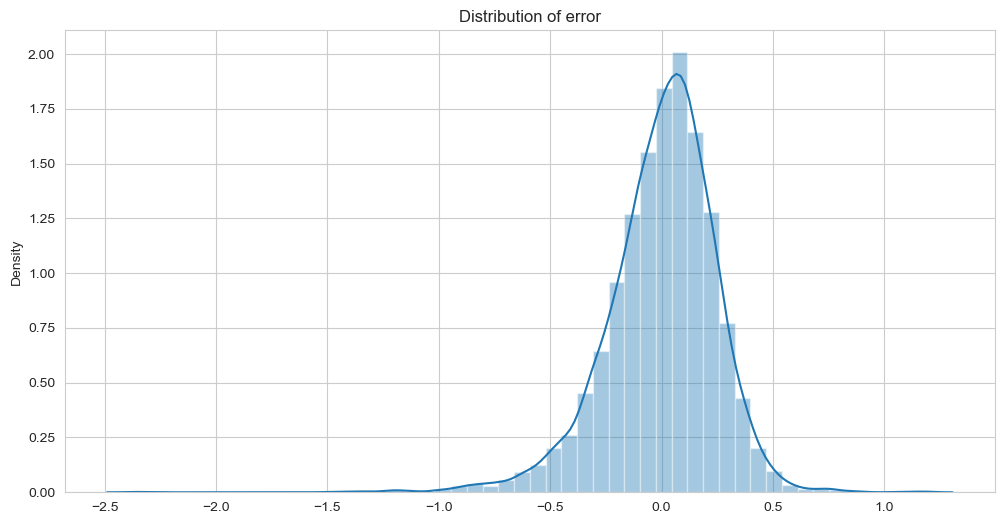

In [116]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(second.resid)
plt.show()

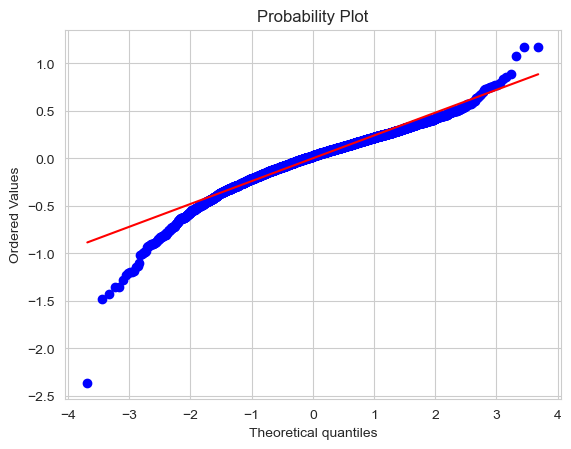

In [117]:
ss.probplot(second.resid, dist="norm", plot=pylab)
pylab.show()

In [118]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_sec = sms.het_breuschpagan(second.resid, second.model.exog)
lzip(names, test_result_sec)

[('Lagrange multiplier statistic', 392.1197661122233),
 ('p-value', 6.57314724597962e-79),
 ('f-value', 46.5276114457784),
 ('f p-value', 1.1532919965573055e-81)]

#### OLS Model : Removed one more feature with lowest t value i.e, Kilometers_Driven

In [119]:
u,v = dmatrices('Price ~ Location+Fuel_Type+Transmission+Owner_Type+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')

In [120]:
mod = sm.OLS(u,v)
third = mod.fit()
third.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4483.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:04   Log-Likelihood:                -82.556
No. Observations:                6019   AIC:                             183.1
Df Residuals:                    6010   BIC:                             243.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2474      0.058     21.672      0.000       1.135       1.360
Location         0.0210      0.001     16.851      0.000       0.019       0.023
Fuel_Type        0.0351      0.001     31.923      0.000       0.033       0.037
Transmission     0.0179      0.001     29.067      0.000       0.017       0.019
Owner_Type       0.0258      0.003      7.485      0.000       0.019       0.033
Mileage         -0.0185      0.001    -18.950      0.000      -0.020      -0.017
Seats            0.0450      0.005      9.535      0.000       0.036       0.054
Car_Make         0.0304      0.000     63.812      0.000       0.029       0.031
car_age         -0.0879      0.001    -73.211      0.000      -0.090      -0.086
==============================================================================
Omnibus:                     1106.186   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4259.028
Skew:                          -0.876   Prob(JB):                         0.00
Kurtosis:                       6.730   Cond. No.                         555.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Condition number has been reduced that indicates Multicolinearty is reduced 

In [121]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_third = sms.het_breuschpagan(third.resid, second.model.exog)
lzip(names, test_result_third)

[('Lagrange multiplier statistic', 391.64570377032936),
 ('p-value', 8.296317380385897e-79),
 ('f-value', 46.46744594095563),
 ('f p-value', 1.479235658916269e-81)]

##### BP test result :
we can see that null hypothesis has been rejected. This indicates that Homoscadesticity of the residuals
are not achieved.

In [122]:
ss.probplot(third.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\3882168392.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




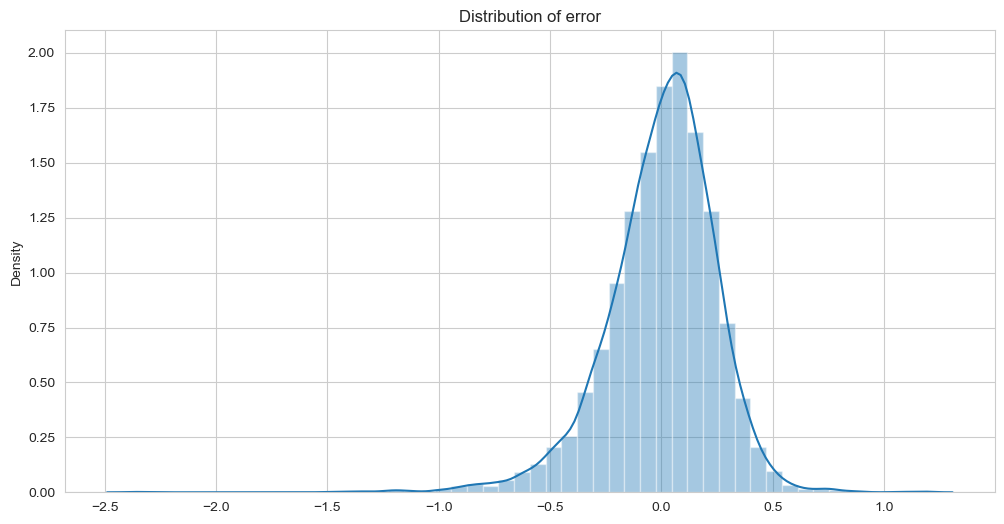

In [123]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(third.resid)
plt.show()

In [124]:
u,v = dmatrices('Price ~ Location+Fuel_Type+Transmission+Owner_Type+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(v.values, i) for i in range(v.shape[1])]
vif['variable'] = v.columns

vif

VIF      variable
0  330.864845     Intercept
1    1.101991      Location
2    1.505643     Fuel_Type
3    1.737442  Transmission
4    1.188666    Owner_Type
5    2.006076       Mileage
6    1.449442         Seats
7    2.153501      Car_Make
8    1.538349       car_age

#### Dropping One more feature with lowest t-value i.e, owner_type

In [125]:
g,h = dmatrices('Price ~ Location+Fuel_Type+Transmission+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')

In [126]:
mod = sm.OLS(g,h)
fourth = mod.fit()
fourth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     5069.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:05   Log-Likelihood:                -110.48
No. Observations:                6019   AIC:                             237.0
Df Residuals:                    6011   BIC:                             290.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5273      0.044     34.739      0.000       1.441       1.613
Location         0.0209      0.001     16.682      0.000       0.018       0.023
Fuel_Type        0.0352      0.001     31.848      0.000       0.033       0.037
Transmission     0.0179      0.001     28.871      0.000       0.017       0.019
Mileage         -0.0185      0.001    -18.790      0.000      -0.020      -0.017
Seats            0.0444      0.005      9.375      0.000       0.035       0.054
Car_Make         0.0304      0.000     63.411      0.000       0.029       0.031
car_age         -0.0910      0.001    -80.550      0.000      -0.093      -0.089
==============================================================================
Omnibus:                     1141.736   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4532.418
Skew:                          -0.895   Prob(JB):                         0.00
Kurtosis:                       6.856   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_fourth = sms.het_breuschpagan(fourth.resid, fourth.model.exog)
lzip(names, test_result_fourth)

[('Lagrange multiplier statistic', 379.98835808942505),
 ('p-value', 4.651284754766637e-78),
 ('f-value', 57.86500404988512),
 ('f p-value', 1.1481649821404745e-80)]

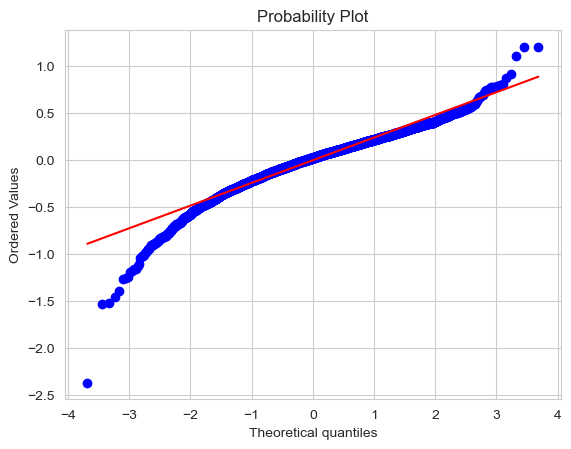

In [128]:
ss.probplot(fourth.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\2682134316.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




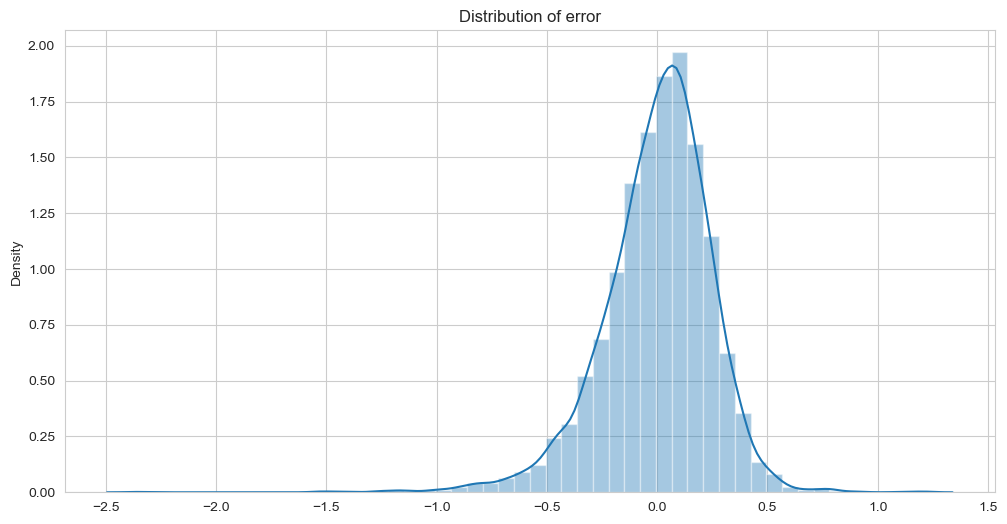

In [129]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fourth.resid)
plt.show()

#### Dropping One more feature with lowest t-value i.e, seats :

In [130]:
j,k = dmatrices('Price ~ Location+Fuel_Type+Transmission+Mileage+Car_Make+car_age',data=df5,return_type='dataframe')

In [131]:
mod = sm.OLS(j,k)
fifth = mod.fit()
fifth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     5815.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:06   Log-Likelihood:                -154.17
No. Observations:                6019   AIC:                             322.3
Df Residuals:                    6012   BIC:                             369.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8352      0.029     62.367      0.000       1.778       1.893
Location         0.0208      0.001     16.482      0.000       0.018       0.023
Fuel_Type        0.0397      0.001     39.533      0.000       0.038       0.042
Transmission     0.0167      0.001     27.360      0.000       0.016       0.018
Mileage         -0.0228      0.001    -26.155      0.000      -0.025      -0.021
Car_Make         0.0296      0.000     62.272      0.000       0.029       0.031
car_age         -0.0930      0.001    -83.274      0.000      -0.095      -0.091
==============================================================================
Omnibus:                     1211.737   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4857.758
Skew:                          -0.948   Prob(JB):                         0.00
Kurtosis:                       6.972   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_fourth = sms.het_breuschpagan(fifth.resid, fourth.model.exog)
lzip(names, test_result_fourth)

[('Lagrange multiplier statistic', 411.70129454466945),
 ('p-value', 7.375387741966384e-85),
 ('f-value', 63.04885857580943),
 ('f p-value', 6.098507754963067e-88)]

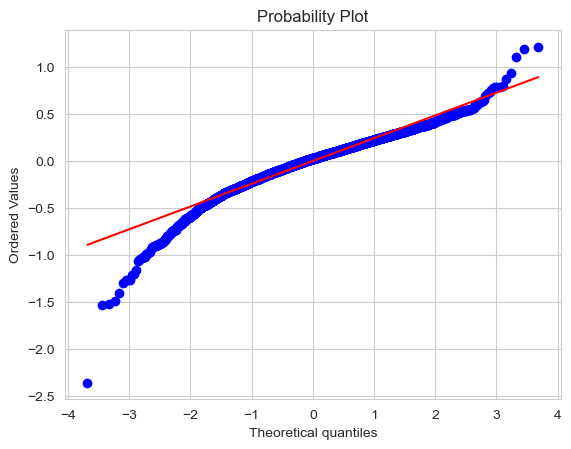

In [133]:
ss.probplot(fifth.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\1474514813.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




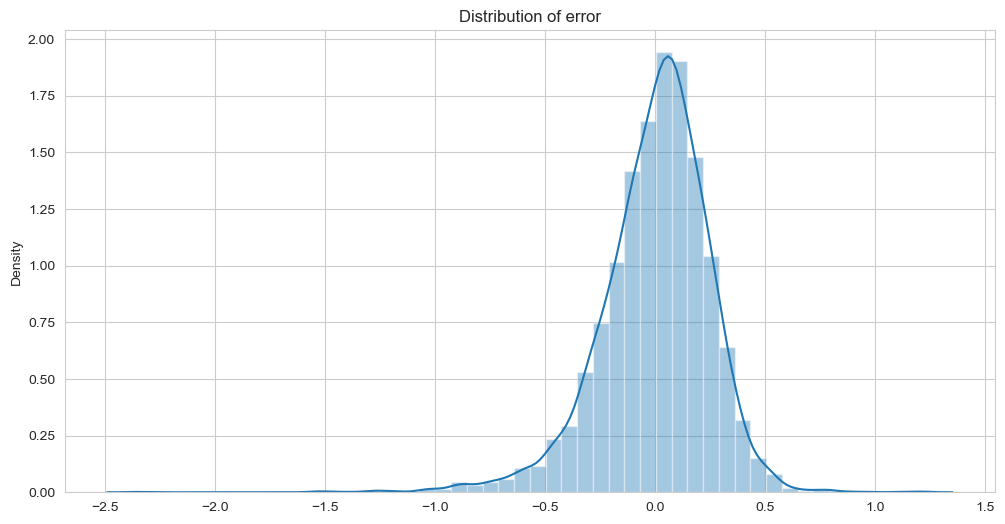

In [134]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fifth.resid)
plt.show()

#### Dropping one more feature with lowest t-value i.e, Location

In [135]:
m,n = dmatrices('Price ~ Fuel_Type+Transmission+Mileage+Car_Make+car_age',data=df5,return_type='dataframe')

In [136]:
mod = sm.OLS(m,n)
sixth = mod.fit()
sixth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     6625.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:07   Log-Likelihood:                -287.16
No. Observations:                6019   AIC:                             586.3
Df Residuals:                    6013   BIC:                             626.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0961      0.025     82.660      0.000       2.046       2.146
Fuel_Type        0.0396      0.001     38.602      0.000       0.038       0.042
Transmission     0.0171      0.001     27.476      0.000       0.016       0.018
Mileage         -0.0242      0.001    -27.275      0.000      -0.026      -0.022
Car_Make         0.0300      0.000     61.649      0.000       0.029       0.031
car_age         -0.0977      0.001    -88.311      0.000      -0.100      -0.095
==============================================================================
Omnibus:                     1216.787   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4732.454
Skew:                          -0.961   Prob(JB):                         0.00
Kurtosis:                       6.895   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_fifth = sms.het_breuschpagan(sixth.resid, fifth.model.exog)
lzip(names, test_result_fifth)

[('Lagrange multiplier statistic', 356.3085740409424),
 ('p-value', 6.823609491577257e-74),
 ('f-value', 63.047968595349985),
 ('f p-value', 3.477174917097395e-76)]

In [138]:
ss.probplot(sixth.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\2350550924.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




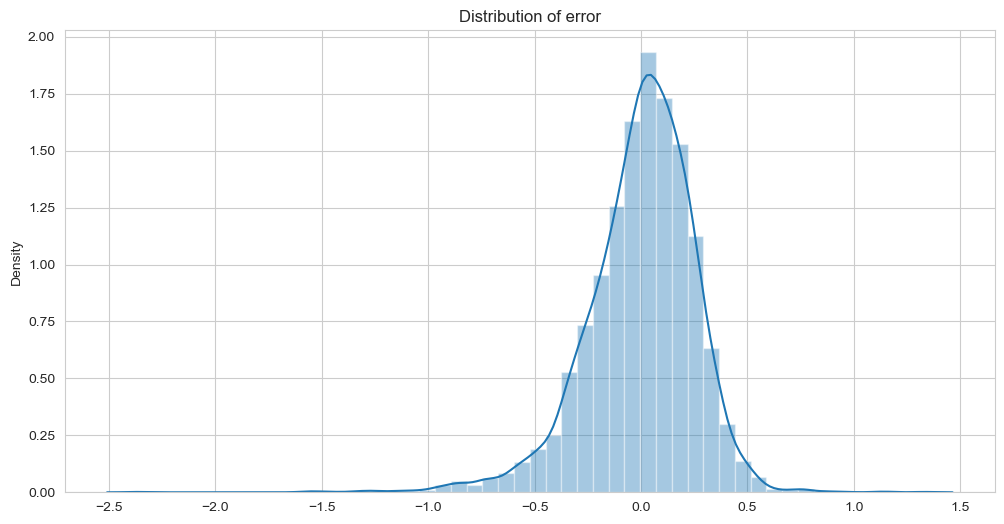

In [139]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(sixth.resid)
plt.show()

#### Dropping one more feature with lowest t-value i.e, Transmission

In [140]:
p,q = dmatrices('Price ~ Fuel_Type+Mileage+Car_Make+car_age',data=df5,return_type='dataframe')

In [141]:
mod = sm.OLS(p,q)
sixth = mod.fit()
sixth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     7191.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:08   Log-Likelihood:                -643.09
No. Observations:                6019   AIC:                             1296.
Df Residuals:                    6014   BIC:                             1330.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2876      0.026     88.444      0.000       2.237       2.338
Fuel_Type      0.0381      0.001     35.058      0.000       0.036       0.040
Mileage       -0.0273      0.001    -29.296      0.000      -0.029      -0.026
Car_Make       0.0368      0.000     83.338      0.000       0.036       0.038
car_age       -0.1003      0.001    -85.887      0.000      -0.103      -0.098
==============================================================================
Omnibus:                     1302.433   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5665.922
Skew:                          -0.996   Prob(JB):                         0.00
Kurtosis:                       7.316   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_sixth = sms.het_breuschpagan(sixth.resid, sixth.model.exog)
lzip(names, test_result_sixth)

[('Lagrange multiplier statistic', 521.3283393864624),
 ('p-value', 1.6320510155850134e-111),
 ('f-value', 142.57256647081624),
 ('f p-value', 1.2744776075639547e-116)]

In [143]:
ss.probplot(sixth.resid, dist="norm", plot=pylab)
pylab.show()

In [144]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(sixth.resid)
plt.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\2350550924.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




In [145]:
e,f = dmatrices('Price ~ Car_Make+car_age+Fuel_Type',data=df5,return_type='dataframe')

In [146]:
mod = sm.OLS(e,f)
seventh = mod.fit()
seventh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     8142.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:18:09   Log-Likelihood:                -1044.6
No. Observations:                6019   AIC:                             2097.
Df Residuals:                    6015   BIC:                             2124.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6789      0.016    101.966      0.000       1.647       1.711
Car_Make       0.0435      0.000    107.072      0.000       0.043       0.044
car_age       -0.0869      0.001    -75.676      0.000      -0.089      -0.085
Fuel_Type      0.0298      0.001     26.594      0.000       0.028       0.032
==============================================================================
Omnibus:                     1295.268   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6167.118
Skew:                          -0.963   Prob(JB):                         0.00
Kurtosis:                       7.570   Cond. No.                         80.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_sev = sms.het_breuschpagan(seventh.resid, seventh.model.exog)
lzip(names, test_result_sev)

[('Lagrange multiplier statistic', 642.8834900746532),
 ('p-value', 5.085153267154631e-139),
 ('f-value', 239.76068882063325),
 ('f p-value', 5.909993986460238e-147)]

In [148]:
ss.probplot(seventh.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_25532\1312681104.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




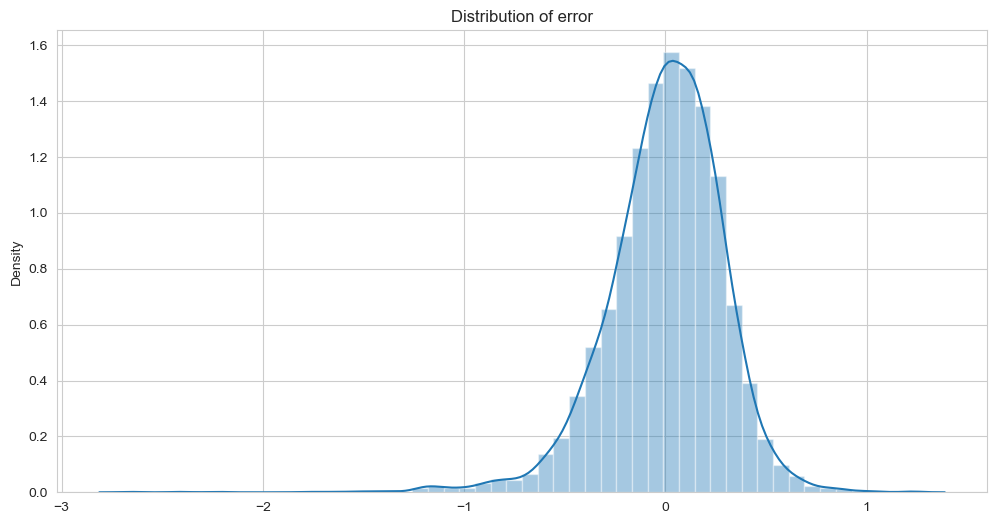

In [149]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(seventh.resid)
plt.show()

### Feature Selection Using Random Forest Regressor

In [150]:
X = df6.drop(['Price'],axis=1)
y = df6['Price']

In [151]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X,y)
rfr_model.feature_importances_

array([0.00971646, 0.01752174, 0.02858057, 0.00322579, 0.01816679,
       0.01744684, 0.00147843, 0.00225112, 0.00306463, 0.74900536,
       0.14954227])

<AxesSubplot:>

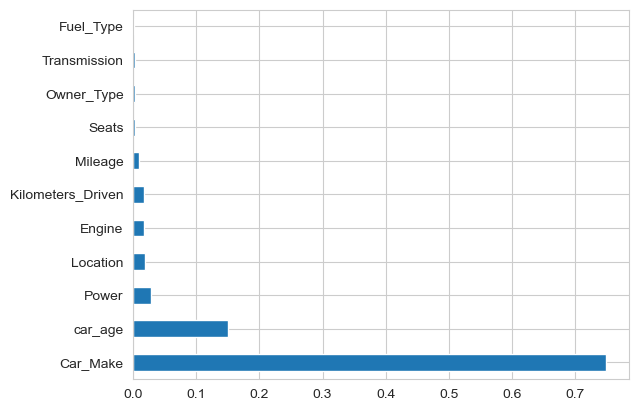

In [152]:
feature_imp = pd.Series(rfr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')

#### We can observe from the plot that Car_Make is the most important feature followed by car_age,Power,Location,Engine respectively. Fuel_Type is the least important feature.

### Building model with all the features and before doing Standardization : 

#### Linear Regression Model

#### Train Test Split

In [236]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [237]:
model = LinearRegression()

In [238]:
model.fit(X_train,y_train)

LinearRegression()

In [239]:
y_pred = model.predict(X_test)

In [240]:
y_pred_train=model.predict(X_train)

##### Testing Score

In [241]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.8761888337257928

##### Training Score

In [242]:
r2 = metrics.r2_score(y_train, y_pred_train)
r2

0.8838765993034703

### Testing 

#### MSE

In [243]:
mse_lr = metrics.mean_squared_error(y_test, y_pred)
mse_lr

0.053894792424207145

#### RMSE

In [244]:
rmse_lr = metrics.mean_squared_error(y_test, y_pred,squared=False)
rmse_lr

0.2321525197455482

### Training

#### MSE

In [245]:
mse_lr = metrics.mean_squared_error(y_train, y_pred_train)
mse_lr

0.04788282527963224

#### RMSE

In [246]:
rmse_lr = metrics.mean_squared_error(y_train, y_pred_train,squared=False)
rmse_lr

0.21882144611447993

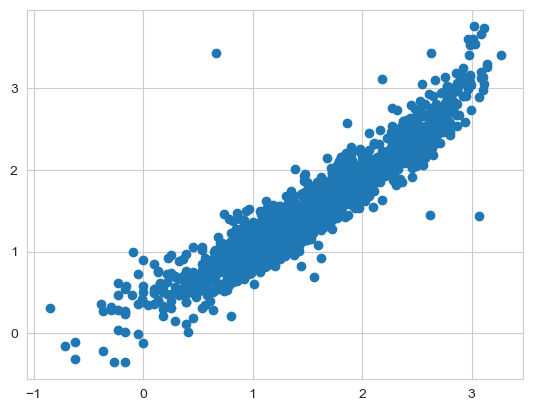

In [247]:
plt.scatter(y_test,y_pred)

### Standardization Process

In [248]:
scaler = StandardScaler()

#### Train Test Split

In [249]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [250]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [251]:
X_train.head()

Mileage    Engine     Power     Seats  Location  Kilometers_Driven  \
0  0.856267 -0.700735 -0.721669 -0.342525 -1.319958           0.511110   
1  0.482525 -0.704046 -0.628413 -0.342525  0.178152          -0.986539   
2 -0.667113  0.921920  0.511173  2.146936  0.552679           0.352638   
3  1.540368 -0.619602 -0.719804 -0.342525 -1.319958           1.513734   
4 -0.367682 -0.702390 -0.721669 -0.342525  0.552679           0.032098   

   Fuel_Type  Transmission  Owner_Type  Car_Make   car_age  
0   0.937364     -0.631457    0.424263 -0.563015  0.740267  
1  -1.045408     -0.631457    0.424263 -0.666356 -0.804277  
2   0.937364     -0.631457    0.424263  0.057030 -0.186460  
3   0.937364     -0.631457    0.424263 -0.459674  0.122449  
4  -1.045408     -0.631457    0.424263 -0.563015  0.740267

In [252]:
model = LinearRegression()

In [253]:
model.fit(X_train,y_train)

LinearRegression()

In [254]:
y_pred = model.predict(X_test)
y_pred_train=model.predict(X_train)

##### Testing Score

In [255]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.876188833725796

##### Training Score

In [256]:
r2 = metrics.r2_score(y_train, y_pred_train)
r2

0.8838765993034704

#### We can say after observing the result that result has not improved much after doing Standardization.

#### Plot

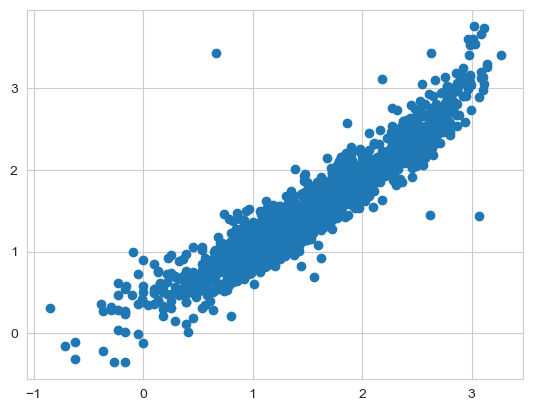

In [257]:
plt.scatter(y_test,y_pred)

### Testing 

#### MSE

In [258]:
mse_lr = metrics.mean_squared_error(y_test, y_pred)
mse_lr

0.053894792424205765

#### RMSE

In [259]:
rmse_lr = metrics.mean_squared_error(y_test, y_pred,squared=False)
rmse_lr

0.2321525197455452

### Training

#### MSE

In [260]:
mse_lr = metrics.mean_squared_error(y_train, y_pred_train)
mse_lr

0.04788282527963223

#### RMSE

In [261]:
rmse_lr = metrics.mean_squared_error(y_train, y_pred_train,squared=False)
rmse_lr

0.2188214461144799

In [262]:
df_lr=df6.copy()

### Feature Selection :

#### We are selecting Top features using feature importance excluding Power and Engine. As Power and Engine has multicolinearity.

In [263]:
#df_reg=df_lr.drop(['Owner_Type','Mileage','Seats','Price','Kilometers_Driven'],axis=1)

In [264]:
df_reg=df_lr.drop(['Owner_Type','Seats','Price','Fuel_Type',"Transmission",'Engine','Power'],axis=1)

In [265]:
y=df6['Price']

In [266]:
df_reg.head()

Mileage  Location  Kilometers_Driven  Car_Make  car_age
0    26.60       9.0              72000       3.0       13
1    19.67       7.0              41000      12.0        8
2    18.20       8.0              46000       6.0       12
3    20.77       8.0              87000       7.0       11
4    15.20      15.0              40670      18.0       10

#### We have selected Mileage,Location,Kilometers_Driven,Car_Make,car_age features to build the models.

#### Train-Test Split

In [267]:
X_train,X_test,y_train,y_test = train_test_split(df_reg,y,test_size=0.3,random_state=42)

#### Standardization

In [268]:
scaler = StandardScaler()

#### Train-Test Split

In [269]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

### Linear Regression

In [270]:
model = LinearRegression()

In [271]:
model.fit(X_train,y_train)

LinearRegression()

In [272]:
y_pred = model.predict(X_test)
y_pred_train=model.predict(X_train)

#### Testing Score

In [273]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.7558043076034443

### Training Score

In [274]:
r2 = metrics.r2_score(y_train, y_pred_train)
r2

0.8005384761393108

#### Plot

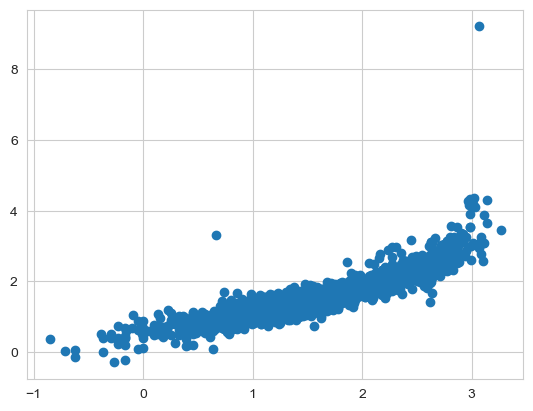

In [275]:
plt.scatter(y_test,y_pred)

### Testing

##### MSE 

In [276]:
mse_lr = metrics.mean_squared_error(y_test, y_pred)
mse_lr

0.10629797415404556

##### RMSE

In [277]:
rmse_lr = metrics.mean_squared_error(y_test, y_pred,squared=False)
rmse_lr

0.3260337009483001

### Training

#### MSE

In [278]:
mse_lr = metrics.mean_squared_error(y_train, y_pred_train)
mse_lr

0.08224682742447449

#### RMSE

In [279]:
rmse_lr = metrics.mean_squared_error(y_train, y_pred_train,squared=False)
rmse_lr

0.2867870768086918

### Random Forest

In [280]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,5,1)
n_estimators_range = np.arange(100,150,50)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range,max_depth=[1,2,3,4,5,6,7,8])

rf_regressor = RandomForestRegressor(n_jobs = -1)
grid_cv_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3)

grid_cv_rf.fit(X_train,y_train)
print(f" Best Hyperparameters {grid_cv_rf.best_params_}")


 Best Hyperparameters {'max_depth': 8, 'max_features': 4, 'n_estimators': 100}


#### Model Score

In [281]:
print(f" Test Score  {grid_cv_rf.score(X_test,y_test)}")
print( f" Train Score  {grid_cv_rf.score(X_train,y_train)}")

 Test Score  0.9214577229778256
 Train Score  0.9517936707567191


In [282]:
y_pred_test=grid_cv_rf.predict(X_test)

In [283]:
y_pred_train=grid_cv_rf.predict(X_train)

### Test

#### MSE and RMSE

In [284]:
print(f"RMSE for Random Forest Regression is {metrics.mean_squared_error(y_test, y_pred_test,squared=False)}")

RMSE for Random Forest Regression is 0.18490354533307693


In [285]:
print(f"MSE for Random Forest Regression is {metrics.mean_squared_error(y_test, y_pred_test)}")

MSE for Random Forest Regression is 0.03418932107674124


### Train

#### RMSE

In [286]:
print(f"RMSE for Random Forest Regression is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}")

RMSE for Random Forest Regression is 0.14098796506679714


#### MSE

In [287]:
print(f"MSE for Random Forest Regression is {metrics.mean_squared_error(y_train, y_pred_train)}")

MSE for Random Forest Regression is 0.01987760629367641


#### Plot

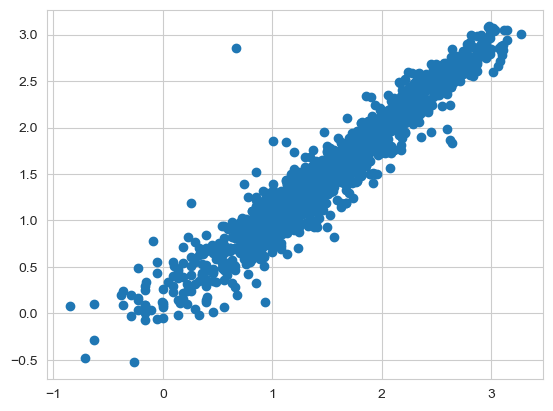

In [288]:
plt.scatter(y_test,y_pred_test)

### Decision Tree

In [289]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,8,1)
param_grid = dict(max_features=max_features_range,max_depth=[1,2,3,4,5,6,7])

dt_regressor = DecisionTreeRegressor()
grid_cv_tree = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=10)

grid_cv_tree.fit(X_train,y_train)

print(f" Best Hyperparameters {grid_cv_tree.best_params_}")


 Best Hyperparameters {'max_depth': 7, 'max_features': 5}


C:\Users\ramit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


140 fits failed out of a total of 490.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ramit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ramit\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\ramit\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be i

#### Model Score

In [290]:
print(f" Test Score  {grid_cv_tree.score(X_test,y_test)}")
print( f" Train Score  {grid_cv_tree.score(X_train,y_train)}")

 Test Score  0.8969795743752924
 Train Score  0.927130790396198


In [291]:
y_pred_test_tree=grid_cv_tree.predict(X_test)

In [292]:
y_pred_train_tree=grid_cv_tree.predict(X_train)

#### Testing

#### MSE and RMSE

In [293]:
print(f"RMSE for Random Forest Regression is {metrics.mean_squared_error(y_test, y_pred_test_tree,squared=False)}")

RMSE for Random Forest Regression is 0.21176547875013477


In [294]:
print(f"MSE for Random Forest Regression is {metrics.mean_squared_error(y_test, y_pred_test_tree)}")

MSE for Random Forest Regression is 0.04484461799027378


#### Training

#### MSE and RMSE

In [295]:
print(f"RMSE for Random Forest Regression is {metrics.mean_squared_error(y_train, y_pred_train_tree,squared=False)}")

RMSE for Random Forest Regression is 0.17334129643298607


In [296]:
print(f"MSE for Random Forest Regression is {metrics.mean_squared_error(y_train, y_pred_train_tree)}")

MSE for Random Forest Regression is 0.030047205049068347


#### Plot

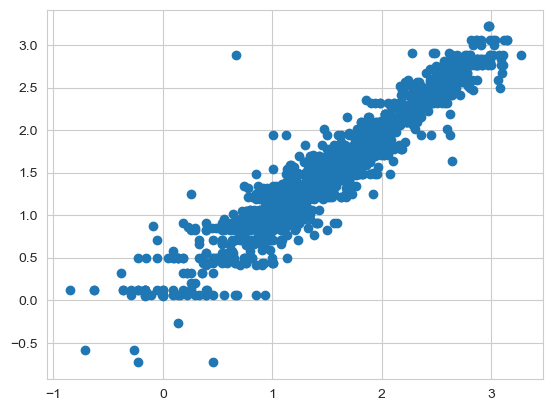

In [297]:
plt.scatter(y_test,y_pred_test_tree)

### Conclusion : 
    

#### We can observe from the results, of all the different models, Random Forest has produced the best result.    

#### Feature which have been used to built Random Forest model are Mileage,Location,Kilometers_Driven,Car_Make,car_age